![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

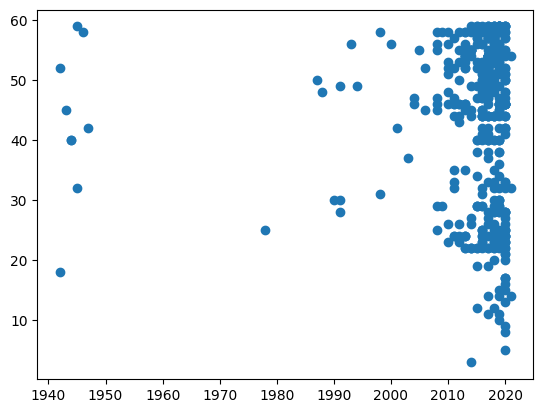

In [78]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

# Load the csv file
netflix_df = pd.read_csv('netflix_data.csv')
#print(netflix_df.info())

# Filter to remove the TV shows
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']
#print(netflix_subset['type'])

# I keep only with 5 columns with the relevant data 
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]
#print(netflix_movies['duration'])

# Filter the movies shorter than 60 minutes
short_movies = netflix_movies[netflix_movies['duration'] < 60]
#print(short_movies['genre'])
genre_of_short_movies = short_movies['genre']
duration_of_short_movies = short_movies['duration']
release_of_short_movies = short_movies['release_year']

# I want to know if there exists relation between the duration of a movie and
# his genre or release_year 

# The duration of the movies has been decreased from past to now?
plt.scatter(release_of_short_movies, duration_of_short_movies)
plt.show()
# with this graphic it looks like there doesn't exists relation 
# between the release year and the duration

Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
International Movies      3
Anime Features            3
Music                     2
Horror Movies             1
Name: genre, dtype: int64


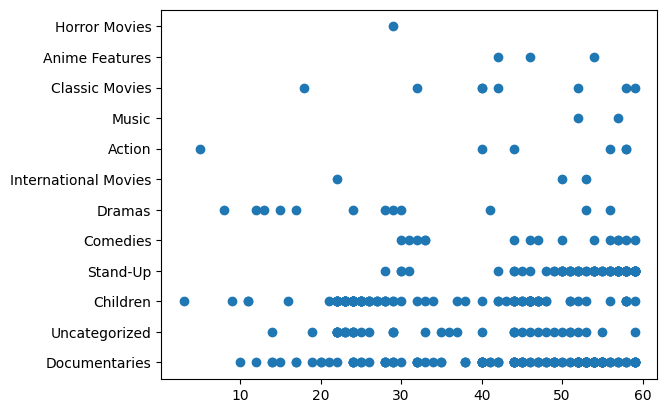

In [79]:
# In the movies with a duration shorter than 60 minutes, 
# ¿there are one genre that has the most of the movies?
print(short_movies['genre'].value_counts())
# whit this I can see that Documentaries, Children and Stand-up genre has
# the most of the short movies, so I can say that exists relation between
# the genre and the duration of a movie
plt.scatter(duration_of_short_movies, genre_of_short_movies)
#plt.scatter(genre_of_short_movies, duration_of_short_movies)
plt.show()

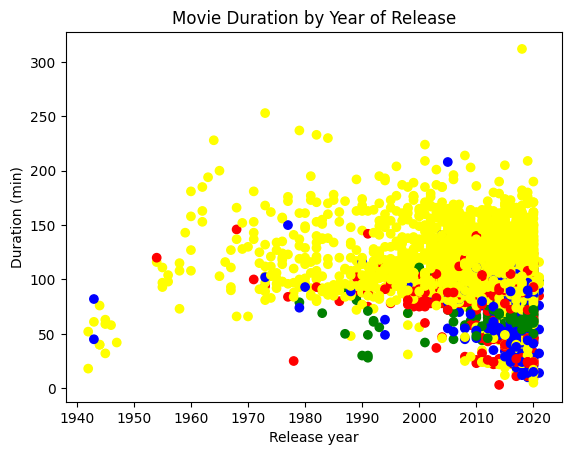

In [80]:
colors_by_genre = {
    'Children': 'Red',
    'Documentaries': 'Blue',
    'Stand-Up': 'Green',
    'Other': 'Yellow'
}

colors = []

for lab, row in netflix_movies.iterrows():
    if row['genre'] in colors_by_genre:
        colors.append(colors_by_genre[row['genre']])
    else:
        colors.append('Yellow')

release_of_netflix_movies = netflix_movies['release_year']
duration_of_netflix_movies = netflix_movies['duration']

fig = plt.figure()

plt.scatter(release_of_netflix_movies, duration_of_netflix_movies, c = colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

In [81]:
# Conclusion: it looks like the doesn't exists relation between the release year
# and the duration of a movie
answer = "no"